In [5]:
import kagglehub
import pandas as pd
from ATV1.limp import limp

path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")
df = pd.read_csv(f"{path}/cardio_train.csv", sep=';')

df = df.drop(columns=["id"], errors="ignore")

print(df.head())

df = limp(df)
X = df.drop(columns=["cardio"])
y = df["cardio"]

provavel_categoricas = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]

features_all = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

features_bin = [col for col in features_all if col in provavel_categoricas]
features_cont = [col for col in features_all if col not in provavel_categoricas]

     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
age, height, weight, ap_hi, ap_lo
gender, cholesterol, gluc, smoke, alco, active
age_years   -> Idade em anos (convertida de 'age' em dias)
height      -> Altura em centímetros
weight      -> Peso em quilogramas
ap_hi       -> Pressão arterial sistólica (máxima)
ap_lo       -> Pressão arterial diastólica (mínima)
gender      -> Sexo: 1 = homem, 2 = mulher
cholesterol -> Nível de coles

### Descrição das Variáveis

**Variáveis contínuas:**
`age_years`, `height`, `weight`, `ap_hi`, `ap_lo`

**Variáveis binárias/categóricas:**
`gender`, `cholesterol`, `gluc`, `smoke`, `alco`, `active`, `cardio`

---

**Detalhamento das variáveis:**

- `age_years` → Idade em anos (convertida de `age` em dias)
- `height` → Altura em centímetros
- `weight` → Peso em quilogramas
- `ap_hi` → Pressão arterial sistólica (máxima)
- `ap_lo` → Pressão arterial diastólica (mínima)

- `gender` → Sexo: 1 = homem, 2 = mulher
- `cholesterol` → Nível de colesterol: 1 = normal, 2 = alto, 3 = muito alto
- `gluc` → Nível de glicose: 1 = normal, 2 = alto, 3 = muito alto
- `smoke` → Fumante: 0 = não, 1 = sim
- `alco` → Consome álcool: 0 = não, 1 = sim
- `active` → Fisicamente ativo: 0 = não, 1 = sim

- `cardio` → Presença de doença cardiovascular: 0 = não, 1 = sim


=== Bloco de Análise Exploratória ===

=== 2.1 Histogramas das variáveis contínuas por classe ===


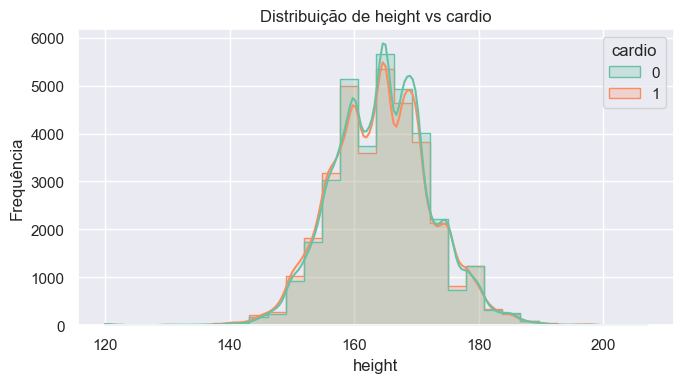

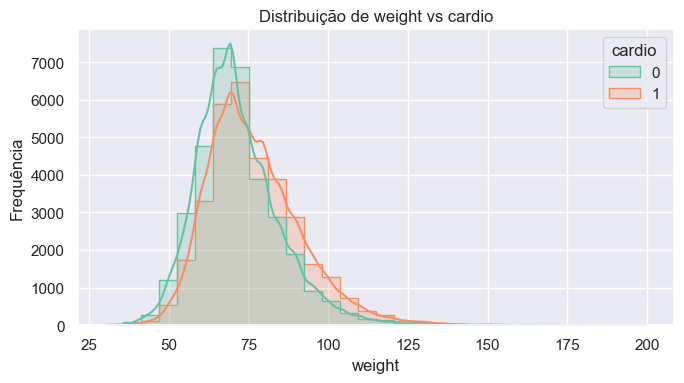

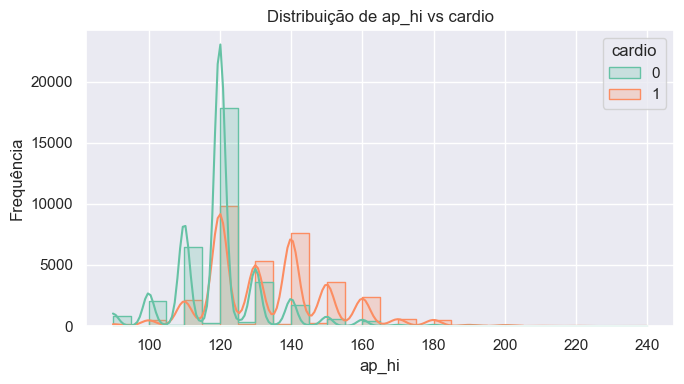

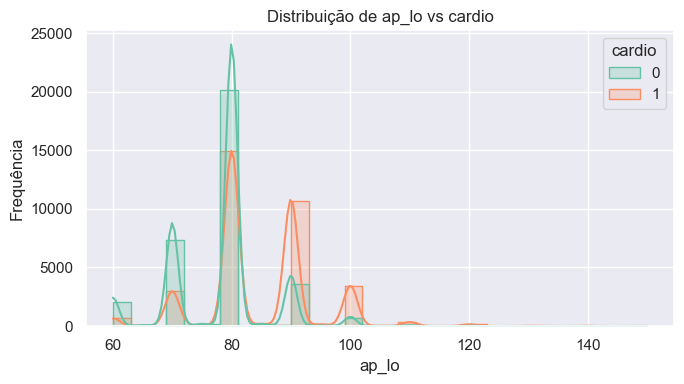

=== 2.2 Countplots de variáveis categóricas selecionadas ===


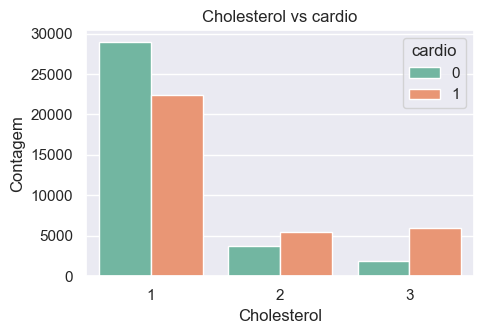

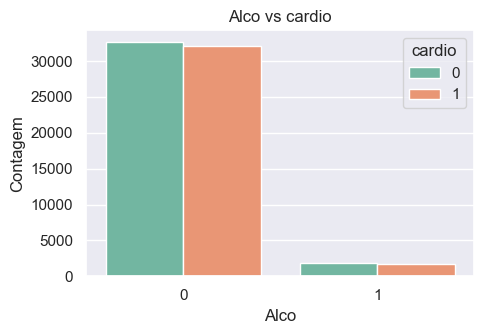

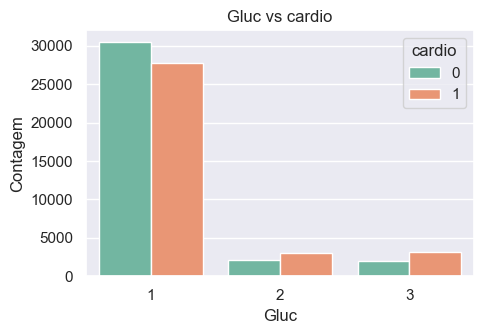

=== 2.3 Pairplot entre variáveis contínuas ===


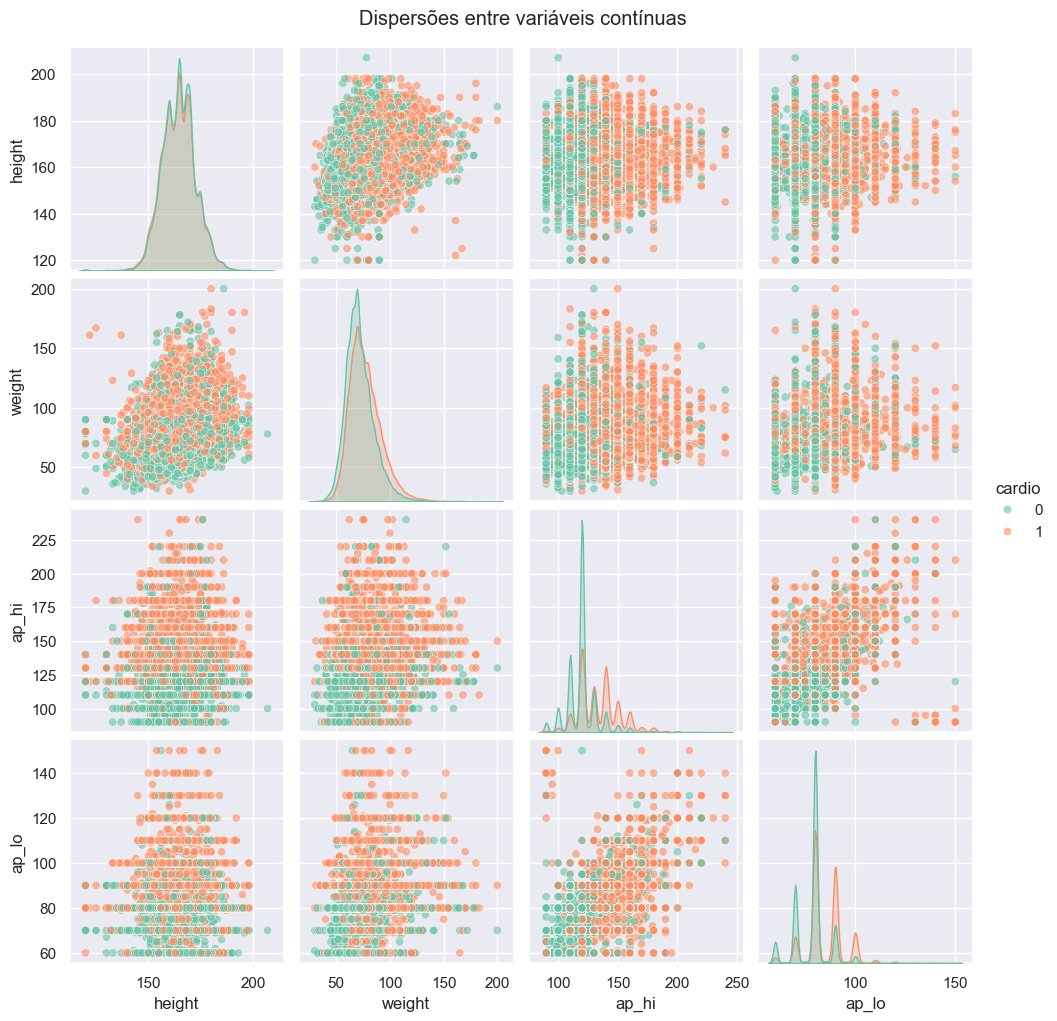

=== 2.4 PCA com Variáveis CONTÍNUAS (normalizadas) ===


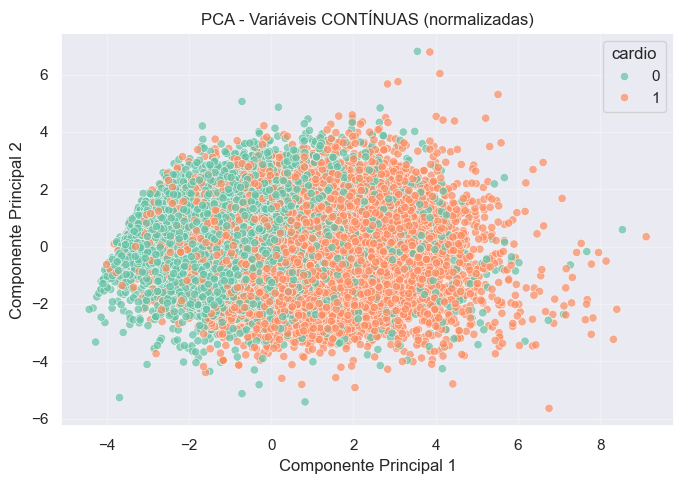

=== 2.5 PCA com CONTÍNUAS (normalizadas) + CATEGÓRICAS (sem normalizar) ===


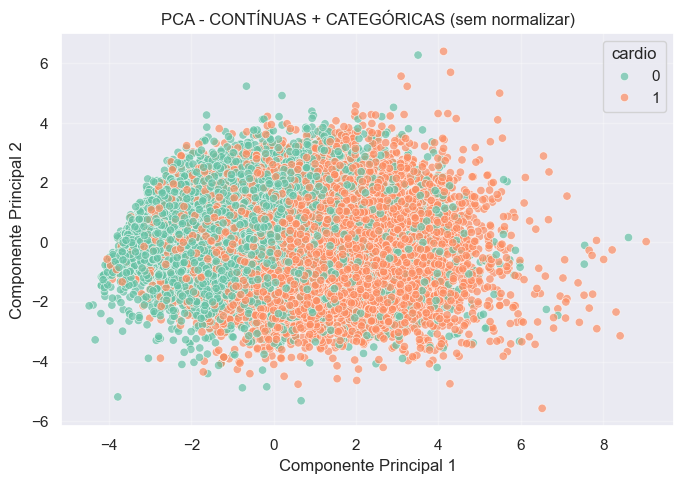

=== 2.6 Fronteira de decisão 3D — KNN (ap_hi, ap_lo, weight) ===


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objects as go
import numpy as np

sns.set_theme(style="darkgrid")

print("=== Bloco de Análise Exploratória ===\n")

print("=== 2.1 Histogramas das variáveis contínuas por classe ===")
features_cont = [col for col in features_cont if col != "age"]

for col in features_cont:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=col, hue='cardio', bins=30, kde=True, element='step', palette='Set2')
    plt.title(f'Distribuição de {col} vs cardio')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

print("=== 2.2 Countplots de variáveis categóricas selecionadas ===")
for col in ['cholesterol', 'alco', 'gluc']:
    plt.figure(figsize=(5, 3.5))
    sns.countplot(data=df, x=col, hue='cardio', palette='Set2')
    plt.title(f'{col.capitalize()} vs cardio')
    plt.xlabel(col.capitalize())
    plt.ylabel('Contagem')
    plt.tight_layout()
    plt.show()

print("=== 2.3 Pairplot entre variáveis contínuas ===")
sns.pairplot(df[features_cont + ['cardio']], hue='cardio', palette='Set2', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Dispersões entre variáveis contínuas", y=1.02)
plt.show()

print("=== 2.4 PCA com Variáveis CONTÍNUAS (normalizadas) ===")
scaler_cont = StandardScaler()
X_cont_scaled = scaler_cont.fit_transform(df[features_cont])
pca_cont = PCA(n_components=2)
X_pca_cont = pca_cont.fit_transform(X_cont_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca_cont[:, 0], y=X_pca_cont[:, 1], hue=df['cardio'], palette='Set2', alpha=0.7)
plt.title("PCA - Variáveis CONTÍNUAS (normalizadas)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("=== 2.5 PCA com CONTÍNUAS (normalizadas) + CATEGÓRICAS (sem normalizar) ===")
X_cont_df = pd.DataFrame(X_cont_scaled, columns=features_cont, index=df.index)
X_combined = pd.concat([X_cont_df, df[features_bin].astype(float)], axis=1)

pca_combined = PCA(n_components=2)
X_pca_combined = pca_combined.fit_transform(X_combined)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca_combined[:, 0], y=X_pca_combined[:, 1], hue=df['cardio'], palette='Set2', alpha=0.7)
plt.title("PCA - CONTÍNUAS + CATEGÓRICAS (sem normalizar)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("=== 2.6 Fronteira de decisão 3D — KNN (ap_hi, ap_lo, weight) ===")
f1, f2, f3 = 'ap_hi', 'ap_lo', 'weight'
X_3d = X[[f1, f2, f3]]
y_3d = y

scaler_3d = StandardScaler()
X_3d_scaled = scaler_3d.fit_transform(X_3d)

sample_idx = np.random.choice(len(X_3d_scaled), size=10000, replace=False)
X_sample = X_3d_scaled[sample_idx]
y_sample = y_3d.iloc[sample_idx]

knn_3d = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_3d.fit(X_sample, y_sample)

grid_lin = np.linspace(-3, 3, 30)
gx, gy, gz = np.meshgrid(grid_lin, grid_lin, grid_lin)
grid_points = np.c_[gx.ravel(), gy.ravel(), gz.ravel()]
grid_pred = knn_3d.predict(grid_points).reshape(gx.shape)

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=X_sample[:, 0], y=X_sample[:, 1], z=X_sample[:, 2],
    mode='markers',
    marker=dict(size=2, color=y_sample, colorscale='Viridis', opacity=0.5),
    name='Pacientes'
))

fig.add_trace(go.Isosurface(
    x=gx.flatten(), y=gy.flatten(), z=gz.flatten(),
    value=grid_pred.flatten().astype(int),
    opacity=0.15,
    surface_count=3,
    colorscale='Viridis',
    showscale=False,
    caps=dict(x_show=False, y_show=False, z_show=False),
    name='Fronteira'
))

fig.update_layout(
    title="Fronteira de Decisão 3‑D — KNN (ap_hi, ap_lo, weight)",
    scene=dict(
        xaxis_title='ap_hi (Pressão Sistólica)',
        yaxis_title='ap_lo (Pressão Diastólica)',
        zaxis_title='weight (Peso)'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()

## 2. Análise Exploratória dos Dados

### 2.1 Histogramas das Variáveis Contínuas por Classe (`cardio`)
Este gráfico mostra a distribuição das variáveis contínuas (`age_years`, `height`, `weight`, `ap_hi`, `ap_lo`) separadas por classe (`cardio = 0` ou `1`).
É útil para verificar se existem diferenças significativas entre os grupos saudáveis e os com doença cardiovascular.
Por exemplo, podemos identificar se pacientes com doença têm, em média, pressão arterial mais alta ou peso diferente.

---

### 2.2 Gráficos de Contagem (Countplot) das Variáveis Categóricas
Apresenta as variáveis categóricas (`cholesterol`, `alco`, `gluc`) separadas por classe `cardio`.
Esses gráficos são importantes para verificar a frequência de cada categoria e sua relação com a doença.
Exemplo: uma quantidade maior de pessoas com `cholesterol = 3` pode estar associada com maior incidência de doença cardiovascular.

---

### 2.3 Pairplot entre Variáveis Contínuas
O Pairplot mostra a dispersão entre cada par de variáveis contínuas e a densidade de cada uma delas.
É útil para:
- Identificar padrões, correlações ou clusters naturais entre variáveis
- Ver se há separação visual entre as classes

---

### 2.4 PCA com Variáveis CONTÍNUAS (normalizadas)
Aqui aplicamos **Análise de Componentes Principais (PCA)** apenas nas variáveis contínuas normalizadas.
O objetivo é reduzir a dimensionalidade e projetar os dados em um espaço 2D que concentre a maior variância possível.
É útil para:
- Ver visualmente se há separação entre as classes
- Analisar se existe estrutura nos dados

---

### 2.5 PCA com CONTÍNUAS + CATEGÓRICAS
Neste gráfico, unimos as variáveis contínuas (normalizadas) com as categóricas binárias (sem normalizar) e aplicamos novamente PCA.
**Mesmo assim, o gráfico gerado ficou muito semelhante ao anterior. Por quê?**

**Explicação**:
As variáveis categóricas binárias (como `smoke`, `alco`, etc.) têm **baixa variância** e são representadas com **valores 0 ou 1**, o que as torna **menos relevantes na matriz de covariância** usada pelo PCA.
Além disso, como são poucos bits de informação, seu impacto total na projeção é pequeno.
**Conclusão:** as variáveis contínuas dominam a variância total, fazendo com que o resultado do PCA com e sem categóricas seja muito similar.

---

### 2.6 Fronteira de Decisão 3D — KNN
Neste gráfico 3D, utilizamos as variáveis `ap_hi`, `ap_lo` e `weight` para treinar um classificador KNN e mostrar sua **fronteira de decisão**.

**O que é uma fronteira de decisão?**
É o "limite" no espaço de atributos onde o modelo muda sua previsão de uma classe para outra.
No caso do KNN, essa fronteira é influenciada pelos exemplos mais próximos (vizinhos), e pode ser bastante irregular.

**Por que isso é útil?**
- Permite entender **como o modelo enxerga os dados**
- Ajuda a visualizar **regiões de decisão** onde o modelo tem mais ou menos confiança
- Permite perceber se há **sobreposição entre as classes** (ex: regiões onde os pontos das duas classes estão misturados)

---



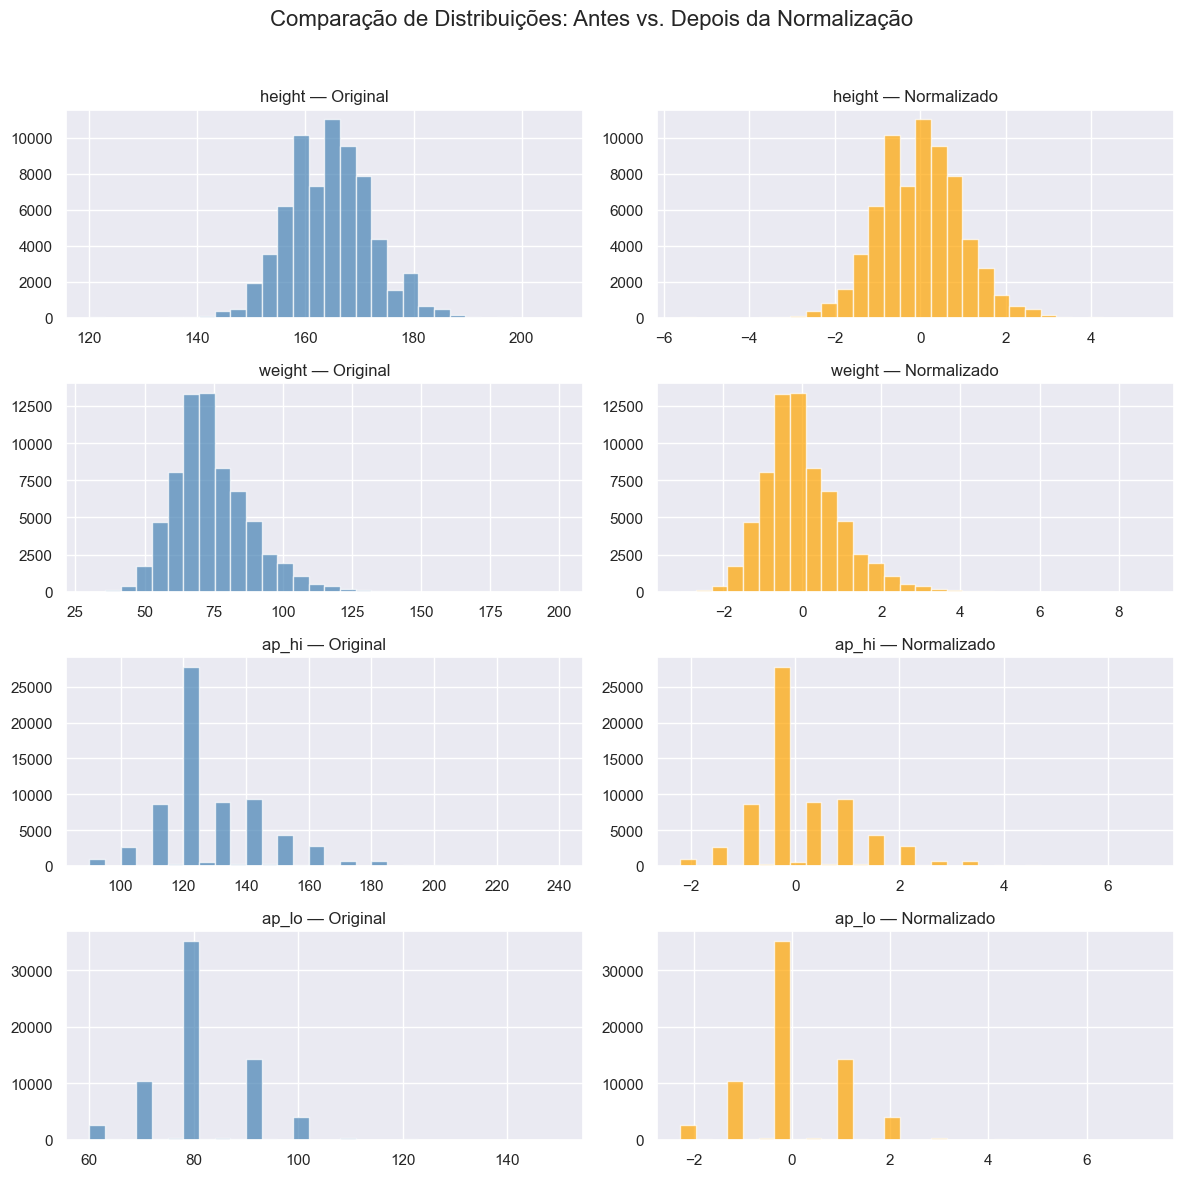

In [7]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[features_cont] = scaler.fit_transform(X[features_cont])

fig, axes = plt.subplots(len(features_cont), 2, figsize=(12, len(features_cont) * 3))
fig.suptitle('Comparação de Distribuições: Antes vs. Depois da Normalização', fontsize=16)

for i, feature in enumerate(features_cont):
    axes[i, 0].hist(X[feature], bins=30, color='steelblue', alpha=0.7)
    axes[i, 0].set_title(f'{feature} — Original')

    axes[i, 1].hist(X_scaled[feature], bins=30, color='orange', alpha=0.7)
    axes[i, 1].set_title(f'{feature} — Normalizado')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Comparação de Distribuições: Antes vs. Depois da Normalização

Este conjunto de gráficos compara a distribuição das **variáveis contínuas** antes e depois da **normalização com `StandardScaler`**.

### O que está sendo feito?

- **À esquerda**: distribuição original de cada variável (`age_years`, `height`, `weight`, `ap_hi`, `ap_lo`, etc.).
- **À direita**: distribuição após aplicar `StandardScaler`, que transforma os dados para terem:
  - Média = 0
  - Desvio padrão = 1

### Por que isso é importante?

- **Algoritmos como KNN eh sensivel com à escala dos dados**,que usa distância.
- Sem normalização, variáveis com maior escala (ex: `weight` vs `height`) dominariam a métrica de distância.
- A normalização permite que **todas as variáveis contribuam igualmente** no aprendizado do modelo.
- **Algoritmos como MLP nao existe a necessidade de usar StandardScaler, entretanto ajuda na convergência ( otimiza o processo de treinamento, permitindo que o gradiente descendente converja mais rapidamente. Isso ocorre porque os pesos são ajustados de forma mais eficiente quando os dados estão em uma escala uniforme. )

### Interpretação visual

- As formas das distribuições permanecem as mesmas (normalização não muda a forma), mas os eixos são centralizados em 0 e padronizados.
- Isso confirma que a transformação foi aplicada corretamente sem distorcer a estrutura dos dados.

---


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np

# ============================================================
# Treinamento com GridSearchCV para múltiplos valores de cv

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, stratify=y, random_state=42
)

param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11, 15, 20, 25, 30, 35, 40, 45, 50],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

melhores_cv = []

for cv_value in [3, 5, 10]:
    print(f"\n===== Rodando GridSearchCV com cv={cv_value} =====")
    grid = GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid=param_grid_knn,
        scoring="accuracy",
        cv=cv_value,
        n_jobs=-1,
        verbose=0
    )
    grid.fit(X_train, y_train)

    print("Melhor combinação de parâmetros:", grid.best_params_)
    print(f"Acurácia média na validação cruzada (cv={cv_value}): {grid.best_score_:.4f}")

    melhores_cv.append({
        "cv": cv_value,
        "score": grid.best_score_,
        "params": grid.best_params_,
        "model": grid.best_estimator_
    })

print("\n===== RESUMO DOS CV TESTADOS =====")
for res in melhores_cv:
    print(f"cv={res['cv']}: acc={res['score']:.4f}, params={res['params']}")

melhor = max(melhores_cv, key=lambda x: x["score"])
print(f"\nMelhor configuração encontrada: cv={melhor['cv']} com acc={melhor['score']:.4f}")
print(f"Parâmetros: {melhor['params']}")

knn_final = melhor['model']
y_pred = knn_final.predict(X_test)

# ============================================================
# Validação Cruzada Manual em Amostra Reduzida (2000 linhas)

sample_idx = np.random.choice(len(X), size=2000, replace=False)
X_demo = X.iloc[sample_idx]
y_demo = y.iloc[sample_idx]

X_train_demo, X_test_demo, y_train_demo, y_test_demo = train_test_split(
    X_demo, y_demo, test_size=0.2, stratify=y_demo, random_state=42
)

scaler_demo = StandardScaler()
X_train_demo_scaled = scaler_demo.fit_transform(X_train_demo)
X_test_demo_scaled = scaler_demo.transform(X_test_demo)

def testar_knn(weight_type):
    k_values = range(1, 51)
    cv_scores = []
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight_type)
        scores = cross_val_score(knn, X_train_demo_scaled, y_train_demo, cv=skf, scoring='accuracy', n_jobs=-1)
        cv_scores.append(scores.mean())

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', label=f'weights=\"{weight_type}\"')
    plt.title(f'Validação Cruzada KNN — Pesos: {weight_type} (k=1 a 50) - 2000 amostras')
    plt.xlabel('Número de Vizinhos (k)')
    plt.ylabel('Acurácia Média')
    plt.grid(True, alpha=0.5)
    plt.legend()
    plt.show()

    best_k = k_values[cv_scores.index(max(cv_scores))]
    print(f"\n\n===== RESULTADO: Validação Manual (weights = {weight_type}) =====")
    print(f"Melhor valor de k: {best_k}")
    print(f"Acurácia média para k={best_k}: {max(cv_scores):.4f}")

testar_knn('uniform')
testar_knn('distance')

# ============================================================

print("\n\n===== COMPARATIVO FINAL =====")
print("- GridSearchCV foi executado com diferentes valores de cv no dataset completo")
print("- Validação manual foi feita com amostra de 2000 linhas (cv=3) para análise rápida e balanceada - Dataset limitado a 2000 linhas e classes mt desbalanceadas")


===== Rodando GridSearchCV com cv=3 =====
Melhor combinação de parâmetros: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Acurácia média na validação cruzada (cv=3): 0.6576

===== Rodando GridSearchCV com cv=5 =====
Melhor combinação de parâmetros: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Acurácia média na validação cruzada (cv=5): 0.6616

===== Rodando GridSearchCV com cv=10 =====
Melhor combinação de parâmetros: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Acurácia média na validação cruzada (cv=10): 0.6657

===== RESUMO DOS CV TESTADOS =====
cv=3: acc=0.6576, params={'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
cv=5: acc=0.6616, params={'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
cv=10: acc=0.6657, params={'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}

Melhor configuração encontrada: cv=10 com acc=0.6657
Parâmetros: {'metric': 'manhattan', 'n_neighbors': 20, 

NameError: name 'cross_val_score' is not defined

## Otimização e Validação do Modelo KNN

### Etapa 1 — Otimização com GridSearchCV

Nesta etapa, aplicamos `GridSearchCV` para encontrar a **melhor combinação de parâmetros** do KNN, testando:

- Número de vizinhos (`n_neighbors`) entre 3 a 50
- Tipo de peso: `"uniform"` (mesmo peso) e `"distance"` (peso proporcional à distância)
- Métrica de distância: `"euclidean"` e `"manhattan"`
- Usamos **validação cruzada com `cv = 3`, `5` e `10`** para comparar o impacto dessa escolha no desempenho.

**Objetivo**: Avaliar qual combinação de hiperparâmetros e valor de `cv` produz melhor acurácia média na validação.

O modelo com melhor desempenho é então treinado com os melhores parâmetros e testado no conjunto `X_test`.

---

### Etapa 2 — Validação Cruzada Manual em Amostra Reduzida

Para aprofundar a análise, realizamos uma **validação cruzada manual** com `StratifiedKFold (cv=3)` usando apenas **2000 amostras aleatórias**, com as seguintes características:

- Amostra balanceada
- Testes com pesos `"uniform"` e `"distance"`
- Variação de `k` de 1 a 50
- Visualização gráfica da acurácia média

**Motivo**: Essa etapa fornece uma **avaliação mais rápida e visual** da sensibilidade do modelo ao número de vizinhos em um subconjunto representativo.

---

### Conclusão Comparativa

- A validação com GridSearchCV em dataset completo garante **abrangência e rigor estatístico**
- A validação manual com 2000 amostras permite **análise rápida e visual**, mesmo com dataset reduzido

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = knn_final.predict(X_test)

print("\n=== Classification Report (base de teste) ===")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Sem Doença', 'Com Doença'],
            yticklabels=['Sem Doença', 'Com Doença'])
plt.title("Matriz de Confusão — KNN Final (Teste)")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.tight_layout()
plt.show()

print(f"Acurácia (Teste): {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score Macro (Teste): {f1_score(y_test, y_pred, average='macro'):.4f}")

## Avaliação Final do Modelo KNN — Base de Teste - 20%

### Classification Report
O relatório de classificação inclui:
- **Precisão** (Precision): proporção de previsões positivas corretas
- **Revocação** (Recall): cobertura dos positivos reais
- **F1-Score**: média harmônica entre precisão e recall
- Resultados separados por classe (`Sem Doença` e `Com Doença`)

### Matriz de Confusão
A matriz de confusão mostra:
- Verdadeiros positivos (TP)
- Verdadeiros negativos (TN)
- Falsos positivos (FP)
- Falsos negativos (FN)

É útil para entender **onde o modelo está errando** — por exemplo, se está confundindo muitos pacientes saudáveis com doentes ou vice-versa.

### Métricas Globais
- **Acurácia**: proporção total de acertos
- **F1-Score Macro**: média do F1 das duas classes, tratando-as com igual importância — importante especialmente em casos de **desequilíbrio de classes**

### Conclusão
Essas métricas ajudam a avaliar a **generalização do modelo** em dados nunca vistos (conjunto de teste), confirmando se o modelo KNN final é confiável para aplicação prática.

---
